In [1]:
import pandas as pd
import numpy as np

IMPORTING THE DATASET

In [2]:
df=pd.read_csv('StudentDataset.csv')
df.head()

,NAME,SUB 1,SUB 2,SUB 3,SUB 4,SUB 5,SUM,Level
0,ARUDHRA BANGARU J,80.0,70.0,85.0,65.0,85.0,385.0,average
1,BHAVADHARANI N,90.0,70.0,50.0,50.0,85.0,345.0,average
2,GNANA SHREE K,85.0,95.0,85.0,85.0,90.0,440.0,good
3,HAMSHIKA S,60.0,55.0,50.0,65.0,0.0,230.0,bad
4,JASHVIHA J,60.0,80.0,55.0,75.0,97.5,367.5,average


In [3]:
df.shape

(98, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NAME    98 non-null     object 
 1   SUB 1   98 non-null     float64
 2   SUB 2   98 non-null     float64
 3   SUB 3   98 non-null     float64
 4   SUB 4   98 non-null     float64
 5   SUB 5   98 non-null     float64
 6   SUM     98 non-null     float64
 7   Level   98 non-null     object 
dtypes: float64(6), object(2)
memory usage: 6.3+ KB


REMOVING UNECESSARY COLUMNS

In [5]:
df=df.drop('NAME',axis=1)
df=df.drop('SUM',axis=1)

In [6]:
df.columns=['Test1','Test2','Test3','Test4','Test5','level']

In [7]:
df.head()

,Test1,Test2,Test3,Test4,Test5,level
0,80.0,70.0,85.0,65.0,85.0,average
1,90.0,70.0,50.0,50.0,85.0,average
2,85.0,95.0,85.0,85.0,90.0,good
3,60.0,55.0,50.0,65.0,0.0,bad
4,60.0,80.0,55.0,75.0,97.5,average


KNOWING THE UNIQUE VALUES IN OUR PREDICTION COLUMN (level)

In [8]:
df['level'].unique()

array(['average', 'good', 'bad'], dtype=object)

CONVERTING THE NON_NUMERIC VALUES TO NUMERIC VALUES

In [9]:
df['level']=df['level'].map({'bad':0,'average':1,'good':2})
df.head(15)

,Test1,Test2,Test3,Test4,Test5,level
0,80.0,70.0,85.0,65.0,85.0,1
1,90.0,70.0,50.0,50.0,85.0,1
2,85.0,95.0,85.0,85.0,90.0,2
3,60.0,55.0,50.0,65.0,0.0,0
4,60.0,80.0,55.0,75.0,97.5,1
5,85.0,100.0,80.0,70.0,97.5,2
6,70.0,95.0,95.0,85.0,95.0,2
7,85.0,100.0,85.0,95.0,90.0,2
8,70.0,95.0,50.0,50.0,60.0,1
9,0.0,45.0,70.0,0.0,55.0,0


VISUALIZING DATA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

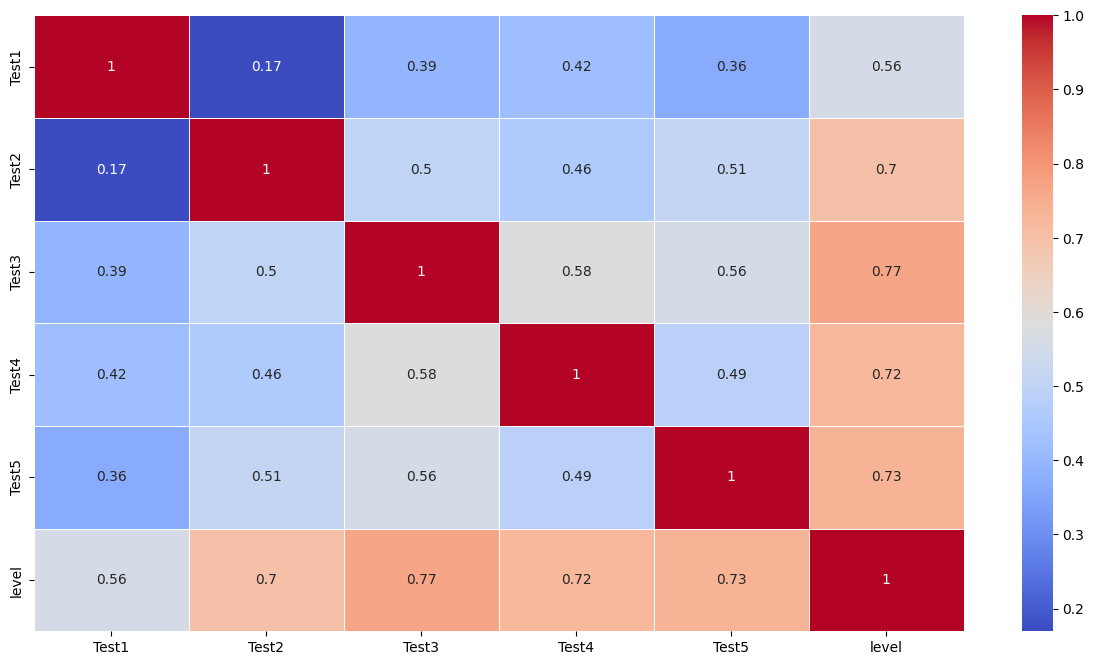

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,cmap='coolwarm')
plt.show()

MODEL BUILDING


In [12]:
from sklearn.model_selection import train_test_split

x=df.drop('level',axis=1)
y=df['level']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)

print(f"oringinal size:{x.shape}")
print(f"train size:{x_train.shape}")
print(f"test size:{x_test.shape}")


oringinal size:(98, 5)
train size:(78, 5)
test size:(20, 5)


Running models for different algorithms

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

models=[]
models.append(('Naive Bayes',GaussianNB()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=8)))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('SVM',SVC(kernel='linear')))

for name,model in models:
    print()
    print()
    print('model-->',name)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('CONFUSION MATRIX')
    print(confusion_matrix(y_test,y_pred))
    print('ACCURACY : ',accuracy_score(y_test,y_pred))
    print('precison : ',precision_score(y_test,y_pred,average='micro'))
    print('recall : ',recall_score(y_test,y_pred,average='micro'))
    print('f1 : ', f1_score(y_test,y_pred,average='micro'))





model--> Naive Bayes
CONFUSION MATRIX
[[ 3  1  0]
 [ 0  5  1]
 [ 0  0 10]]
ACCURACY :  0.9
precison :  0.9
recall :  0.9
f1 :  0.9


model--> KNN
CONFUSION MATRIX
[[ 2  2  0]
 [ 0  4  2]
 [ 0  0 10]]
ACCURACY :  0.8
precison :  0.8
recall :  0.8
f1 :  0.8000000000000002


model--> Random Forest
CONFUSION MATRIX
[[2 2 0]
 [0 2 4]
 [0 1 9]]
ACCURACY :  0.65
precison :  0.65
recall :  0.65
f1 :  0.65


model--> SVM
CONFUSION MATRIX
[[ 3  1  0]
 [ 0  5  1]
 [ 0  0 10]]
ACCURACY :  0.9
precison :  0.9
recall :  0.9
f1 :  0.9


In [14]:
def predictor(marks):
    model= GaussianNB()
    model.fit(x_train,y_train)
    pred=model.predict(marks)
    print(pred)
 
print(predictor([[95,91,89,92,88],[77,67,70,78,80],[50,47,45,60,20]]))

[2 1 0]
None


c:\Users\Sanjay Balaji\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [15]:
marks = [[65,80,76,75,76],[89,80,87,88,90],[45,44,56,78,65]]

predictor(marks)

[1 2 1]


c:\Users\Sanjay Balaji\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
